In [3]:
import itertools
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import lsstypes
from lsstypes import read, mean, cov
#from pkrun import get_measurement_fn

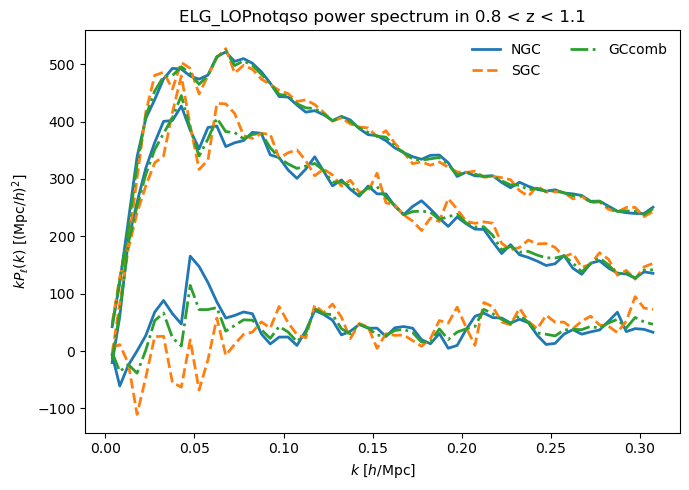

In [6]:
regions = labels = ['NGC','SGC','GCcomb']
kind = 'mesh2_spectrum_poles'

weight_type = 'default_fkp'
ls = ['-','--','-.',':',':']

# tracer='LRG'
# zrange = [(0.4,0.6),(0.6,0.8),(0.8,1.1)]
# tracer='QSO'
# zrange = [(0.8,2.1)]
tracer = 'ELG_LOPnotqso'
zrange = [(0.8,1.1)]

for iz in zrange:
    zmin,zmax = iz
    fig, lax = plt.subplots(1, figsize=(7, 5), sharex=True, squeeze=False)
    lax = lax.ravel()
    lax[0].set_title(f'{tracer} power spectrum in {zmin:.1f} < z < {zmax:.1f}')
    stats = {reg: [] for reg in regions}
    for icolor,region in enumerate(regions):
        #fn = f"/pscratch/sd/a/arosado/checks2/mesh2_spectrum_poles_{tracer}_{region}_z{zmin}-{zmax}_default_FKP_box-10000.0_cell10_nran10.h5"
        #fn = f"/pscratch/sd/a/arosado/checks3/mock451/mesh2_spectrum_poles_{tracer}_{region}_z{zmin}-{zmax}_default_FKP_box-10000.0_cell10_nran10.h5"
        fn = f"/pscratch/sd/a/arosado/checks4/checks1/mock451/mesh2_spectrum_poles_{tracer}_{region}_z{zmin}-{zmax}_default_FKP_nran10_cellsize10_boxsize9000.h5"
        ref = read(fn).select(k=slice(0, None, 5))
        ells = ref.ells
        stats[f"{region}"]=ref
        for ill, ell in enumerate(ells):
            ax = lax[0]
            ax.set_ylabel(rf'$k P_\ell(k)$ [$(\mathrm{{Mpc}}/h)^2$]')
            pole = ref.get(ell)
            value = pole.value().real #- ref.get(ell).values('num_shotnoise')
            ax.plot(pole.coords('k'), pole.coords('k') * value, linestyle=ls[icolor], color=f"C{icolor}",lw=2)
                   
    for icolor,region in enumerate(regions):  
        ax.plot([],[],linestyle=ls[icolor],color=f"C{icolor}", label=region,lw=2)
    ax.legend(frameon=False, ncol=2)    
    lax[-1].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
    #basename = f'comparison_{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}.{ext}'
    plt.tight_layout()
    #fig.savefig('test.png', bbox_inches='tight', pad_inches=0.1, dpi=200)
    plt.show()

In [32]:
from pathlib import Path
def get_catalog_dir(survey='Y1', verspec='iron', version='v1.2', base_dir='/dvs_ro/cfs/cdirs/desi/survey/catalogs'):
    base_dir = Path(base_dir)
    return base_dir / survey / 'LSS' / verspec / 'LSScats' / version

def get_catalog_fn(base_dir, kind='data', tracer='LRG', weight_type='bitwise', zrange=(0.8, 1.1), region='NGC', nran=10, **kwargs):
    # if 'bitwise' in weight_type: is not implemented yet 
    data_dir = Path(base_dir)
    if kind == 'data':
        return data_dir / f'{tracer}_{region}_clustering.dat.fits'
    if kind == 'randoms':
        return [data_dir / f'{tracer}_{region}_{iran:d}_clustering.ran.fits' for iran in range(nran)]
    if kind == 'full_data':
        return data_dir / f'{tracer}_full_HPmapcut.dat.fits'
    if kind == 'full_randoms':
        return [data_dir / f'{tracer}_{iran:d}_full_HPmapcut.ran.fits' for iran in range(nran)]

def get_measurement_fn(kind='mesh2_spectrum_poles', tracer='LRG', zrange=(0.8, 1.1), region='NGC', nran=10, weight_type='default', cut=None, auw=None, **kwargs):
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'/{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}.h5')
    
def get_power_fn(base_dir, file_type='h5', region='', tracer='ELG', tracer2=None, zmin=0, zmax=np.inf, weight_type='default',
                 weight_type2='default', nran=None, option=None, cut=None, auw=None,
                 P0=None,P02=None,ric_dir=None, boxsize=None):
    base_dir = Path(base_dir)
    weight_type1=weight_type
    if tracer2: tracer += '_' + tracer2
    if weight_type2!=weight_type: 
        weight_type += '_' + weight_type2
    # if rec_type: tracer += '_' + rec_type
    if region: tracer += '_' + region
    # if recon_dir != 'n':
    #     out_dir = out_dir[:-2] + recon_dir+'/pk/'
    
    if cut: cut = '_thetacut{}'.format(cut)
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
        
    if option:
        zmax = str(zmax) + option

    root = '{}_z{}-{}_{}{}{}'.format(tracer, zmin, zmax, weight_type, auw, cut)
    if isinstance(boxsize, list): 
        root += '_box-{}_{}_{}'.format(boxsize[0],boxsize[1],boxsize[2])
    else:
        root += '_box-{}'.format(boxsize)
    if nran is not None:
        root += '_nran{}'.format(nran)
    if P0 is not None:
        root += '_P0-{}'.format(P0)
    if P02 is not None:
        root += '_P02-{}'.format(P02)
    if ric_dir is not None:
        ric = 'noric' if 'noric' in ric_dir else 'ric'
        root += '_{}'.format(ric)
    return base_dir / '{}_{}.{}'.format(kind, root, file_type)
    

basedir = get_catalog_dir()
print(get_catalog_fn(basedir))
print(get_power_fn(basedir, tracer2='ELG',P0=1,nran=10))

/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.2/LRG_NGC_clustering.dat.fits
/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.2/mesh2_spectrum_poles_ELG_ELG_z0-inf_default_box-None_nran10_P0-1.h5


In [37]:
common_args = dict(zrange=(0.8,1.1), nran=10, base_dir=basedir, region='NGC')
tracer_args = dict(tracer='ELG', weight_type='default')
tracer2_args = dict(tracer2='LRG', weight_type2='default_FKP')
common_args|tracer_args|tracer2_args

{'zrange': (0.8, 1.1),
 'nran': 10,
 'base_dir': PosixPath('/dvs_ro/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.2'),
 'region': 'NGC',
 'tracer': 'ELG',
 'weight_type': 'default',
 'tracer2': 'LRG',
 'weight_type2': 'default_FKP'}

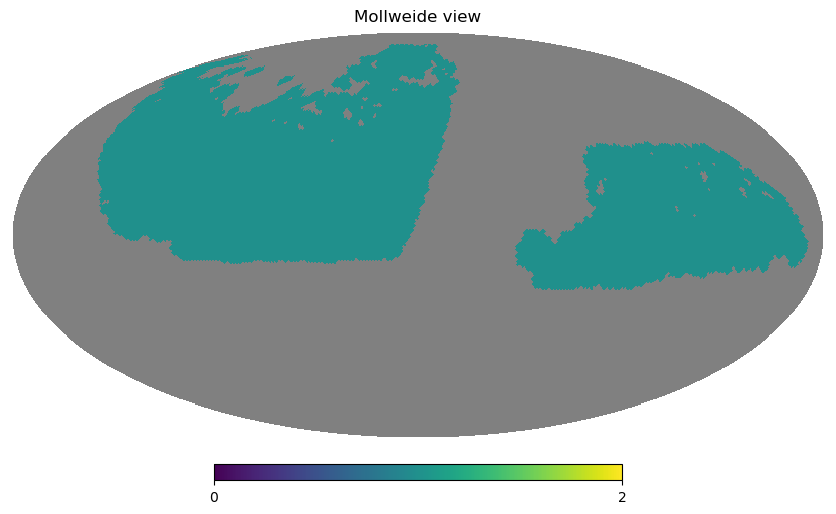

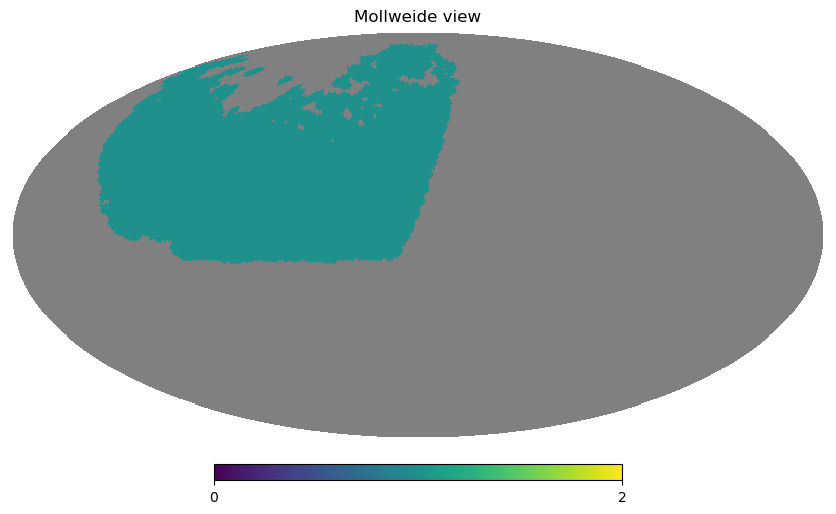

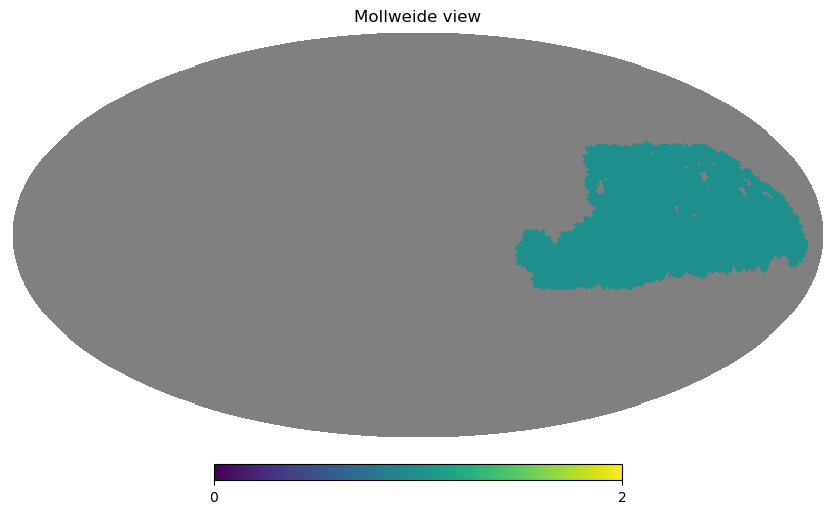

True
True


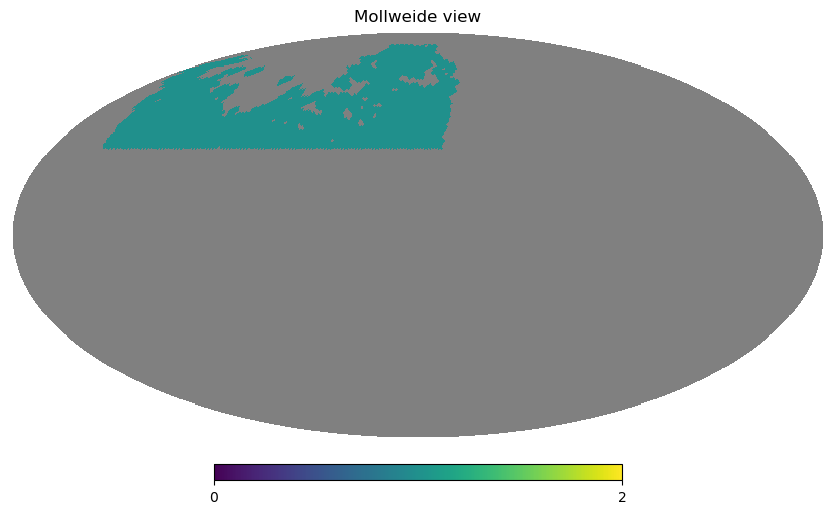

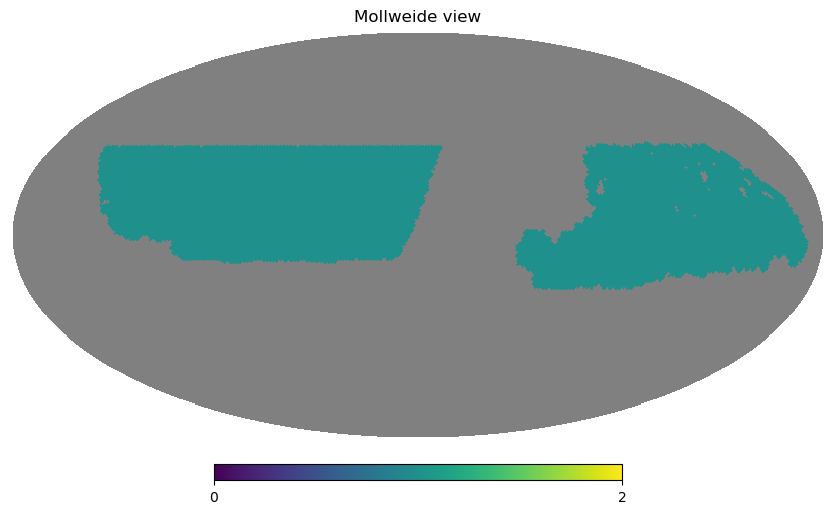

True
True


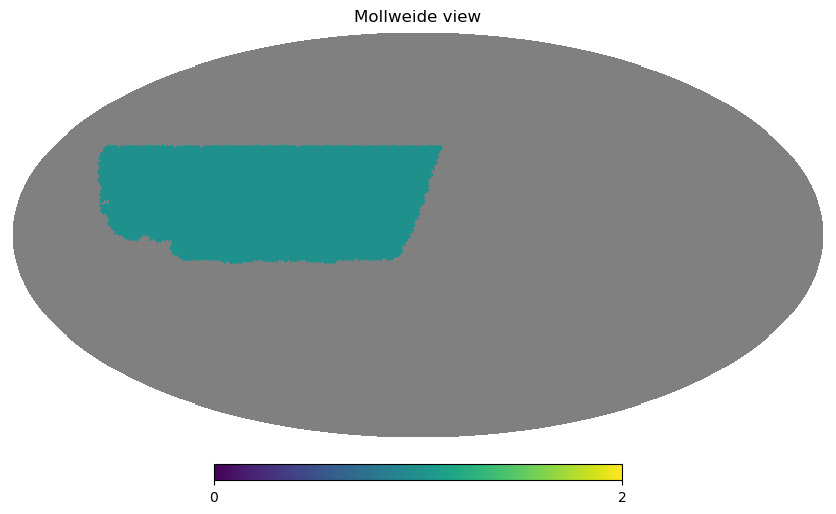

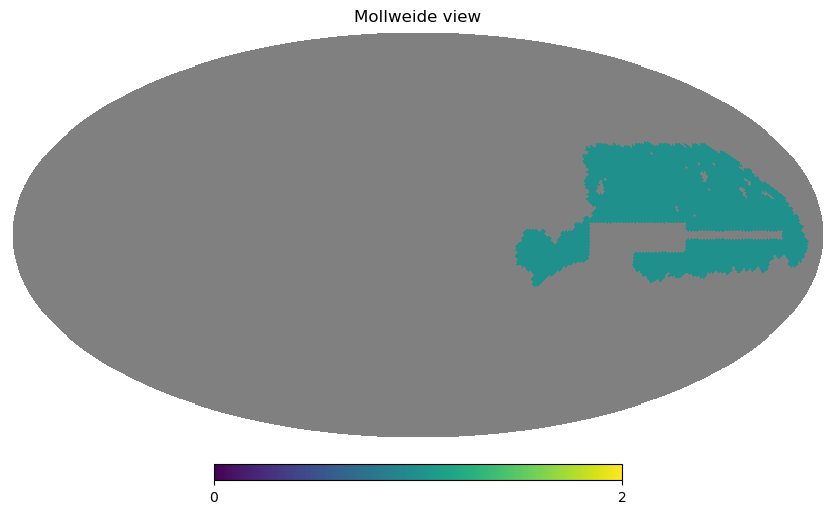

In [1]:
# check select_region() works as espected when splitting full catalog
from pathlib import Path
from tools import select_region, get_clustering_rdzw
import healpy as hp
import fitsio
import numpy as np
import matplotlib.pyplot as plt

nside = 64
def make_hpmap(nside,hpix,fill_value=hp.UNSEEN):
    map_ = np.full(12*nside*nside, fill_value=fill_value)
    map_[hpix] = 1
    return map_
    
def plot_hpmap(nside,ra,dec,fill_value=hp.UNSEEN):
    hpix_unique = np.unique(hp.ang2pix(nside, ra, dec, nest=False, lonlat=True))
    hp.mollview(make_hpmap(nside,hpix_unique,fill_value=fill_value),rot=120)
    plt.show()

base = Path('/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/')
clus_full_all_columns = fitsio.read(base / 'QSO_clustering.dat.fits')
mask_N = clus_full_all_columns['PHOTSYS'] == 'N'
mask_S = clus_full_all_columns['PHOTSYS'] == 'S'

clus_full = get_clustering_rdzw(base / 'QSO_clustering.dat.fits')
plot_hpmap(nside,*clus_full[0][:2],fill_value=hp.UNSEEN)

clus_ngc  = get_clustering_rdzw(base / 'QSO_NGC_clustering.dat.fits')
plot_hpmap(nside,*clus_ngc[0][:2],fill_value=hp.UNSEEN)

clus_sgc  = get_clustering_rdzw(base / 'QSO_SGC_clustering.dat.fits')
plot_hpmap(nside,*clus_sgc[0][:2],fill_value=hp.UNSEEN)


# First check ngc and sgc works
clus_full_ngc = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='NGC')
clus_full_sgc = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='SGC')

print(np.allclose(np.array(clus_full_ngc[0]).flatten(), np.array(clus_ngc[0]).flatten()))
print(np.allclose(np.array(clus_full_sgc[0]).flatten(), np.array(clus_sgc[0]).flatten()))

# Now check if N and S works 
clus_full_N = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='N')
plot_hpmap(nside,*clus_full_N[0][:2],fill_value=hp.UNSEEN)
clus_full_S = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='S')
plot_hpmap(nside,*clus_full_S[0][:2],fill_value=hp.UNSEEN)

print(clus_full_N[0][0].size == mask_N.sum())
print(clus_full_S[0][0].size == mask_S.sum())

# Check GCcomb_noNorth and GCcomb_noDES
clus_full_NGCnoNorth = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='NGCnoN')
plot_hpmap(nside,*clus_full_NGCnoNorth[0][:2],fill_value=hp.UNSEEN)
clus_full_SGCnoDES = get_clustering_rdzw(base / 'QSO_clustering.dat.fits', region='SGCnoDES')
plot_hpmap(nside,*clus_full_SGCnoDES[0][:2],fill_value=hp.UNSEEN)

In [2]:
'NGC' in ['NGC','SGC']

True

In [50]:
np.array(clus_full[0]).flatten()

array([21.87641075, 21.97005436, 22.16512036, ...,  1.28210696,
        1.0072178 ,  0.83830063])

In [1]:
import itertools
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import lsstypes
from lsstypes import read, mean, cov
#from pkrun import get_measurement_fn

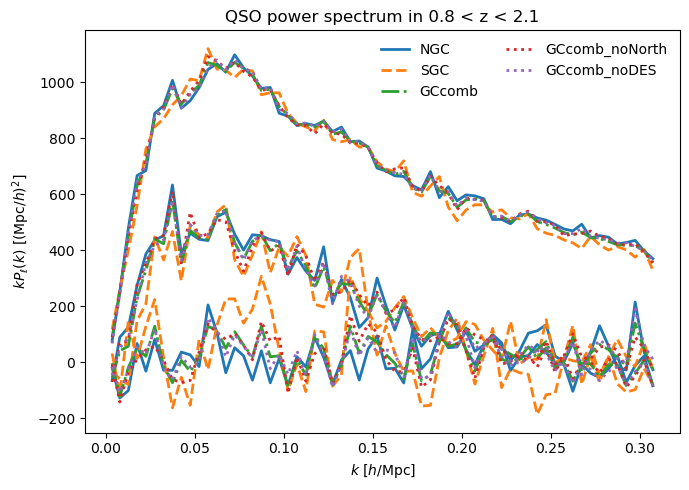

In [14]:
regions = labels = ['NGC','SGC','GCcomb', 'GCcomb_noNorth', 'GCcomb_noDES']
kind = 'mesh2_spectrum_poles'
tracer='QSO'
zrange=(0.8,2.1)
weight_type = 'default_fkp'
ls = ['-','--','-.',':',':']

fig, lax = plt.subplots(1, figsize=(7, 5), sharex=True, squeeze=False)
lax = lax.ravel()
lax[0].set_title(f'{tracer} power spectrum in {zrange[0]:.1f} < z < {zrange[1]:.1f}')
stats = {reg: [] for reg in regions}

for icolor,region in enumerate(regions):
    fn = f"/pscratch/sd/a/arosado/checks/mesh2_spectrum_poles_QSO_{region}_z0.8-2.1_default_FKP_box-10000.0_cell10_nran10.h5"
    ref = read(fn).select(k=slice(0, None, 5))
    ells = ref.ells
    stats[f"{region}"]=ref
    for ill, ell in enumerate(ells):
        ax = lax[0]
        ax.set_ylabel(rf'$k P_\ell(k)$ [$(\mathrm{{Mpc}}/h)^2$]')
        pole = ref.get(ell)
        ax.plot(pole.coords('k'), pole.coords('k') * pole.value().real, linestyle=ls[icolor], color=f"C{icolor}",lw=2)
               
for icolor,region in enumerate(regions):  
    ax.plot([],[],linestyle=ls[icolor],color=f"C{icolor}", label=region,lw=2)
ax.legend(frameon=False, ncol=2)    
lax[-1].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
#basename = f'comparison_{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}.{ext}'
plt.tight_layout()
fig.savefig('test.png', bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

In [8]:
lax

array([<Axes: title={'center': 'QSO power spectrum in 0.8 < z < 2.1'}, ylabel='$k P_0(k)$ [$(\\mathrm{Mpc}/h)^2$]'>],
      dtype=object)

In [6]:
def get_measurement_fn(kind='mesh2_spectrum_poles', test='', version='dr2-v2', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, weight_type='default', **kwargs):
    #base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    base_dir = Path(f'/pscratch/sd/a/arosado/checks/power-spectrum/{test}/')
    base_dir = base_dir / (f'unblinded_data_{recon}' if recon else 'unblinded_data')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{version}/{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}.h5')


In [9]:
!ls /pscratch/sd/a/arosado/checks/power-spectrum/unblinded_data/dr2-v2/mesh2_spectrum_poles_QSO_z0.8-2.1_NGC_default_FKP.h5

mesh2_spectrum_poles_QSO_z0.8-2.1_GCcomb_default_fkp.h5
mesh2_spectrum_poles_QSO_z0.8-2.1_NGC_default_fkp.h5
mesh2_spectrum_poles_QSO_z0.8-2.1_SGC_default_fkp.h5


In [1]:
import itertools
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import lsstypes
from lsstypes import read, mean, cov
from data_pip import get_measurement_fn

plot_dir = Path('_plots')
plot_dir.mkdir(exist_ok=True)

ext = 'png'
regions = ['NGC', 'SGC'][:1]
tracers = [('BGS', (0.1, 0.4)), ('LRG', (0.4, 0.6)), ('LRG', (0.6, 0.8)), ('LRG', (0.8, 1.1)),
           ('ELG_LOPnotqso', (0.8, 1.1)), ('ELG_LOPnotqso', (1.1, 1.6)), ('QSO', (0.8, 2.1))]
versions = ['dr1-v1.5', 'dr2-v2'][:1]
weight_types = ['default', 'default_thetacut', 'default_auw', 'bitwise', 'bitwise_auw']
colors = dict(zip(weight_types, [f'C{i:d}' for i in range(len(weight_types))]))
kinds = ['auw', 'mesh2_spectrum']

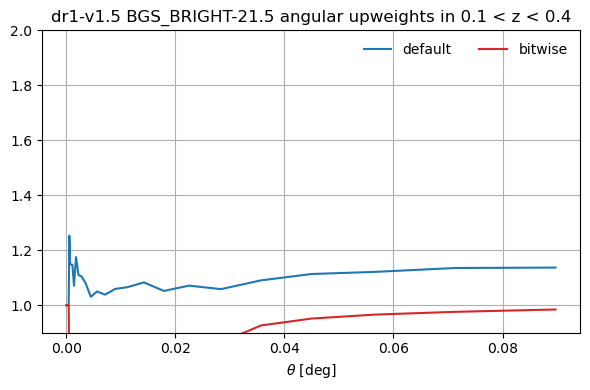

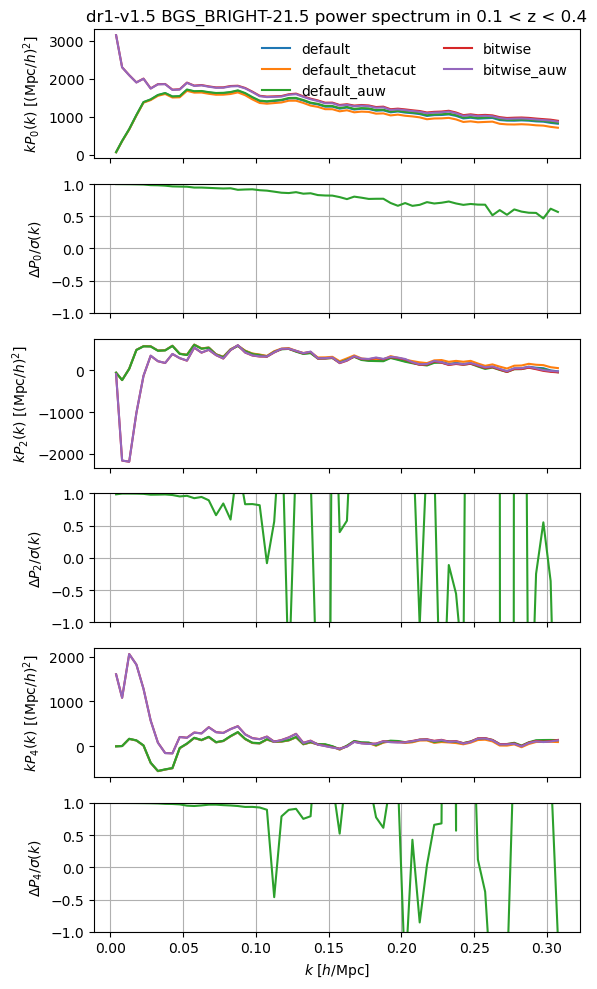

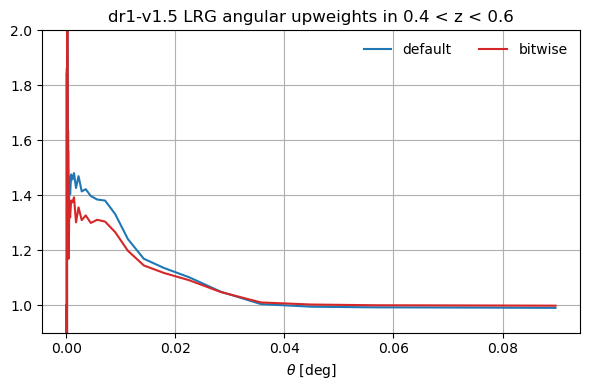

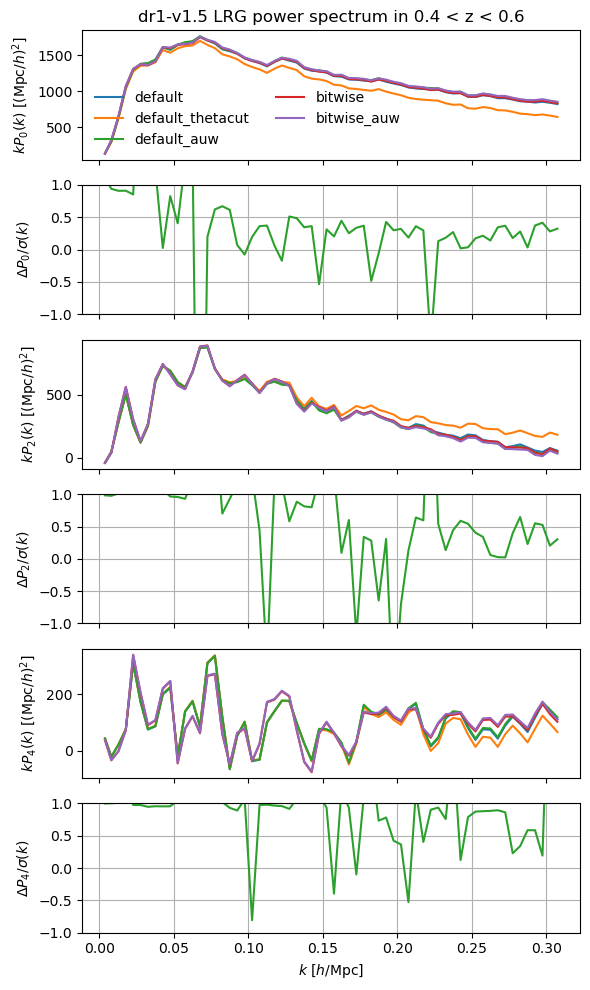

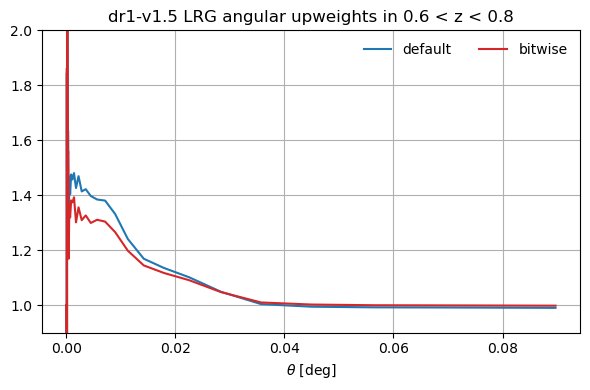

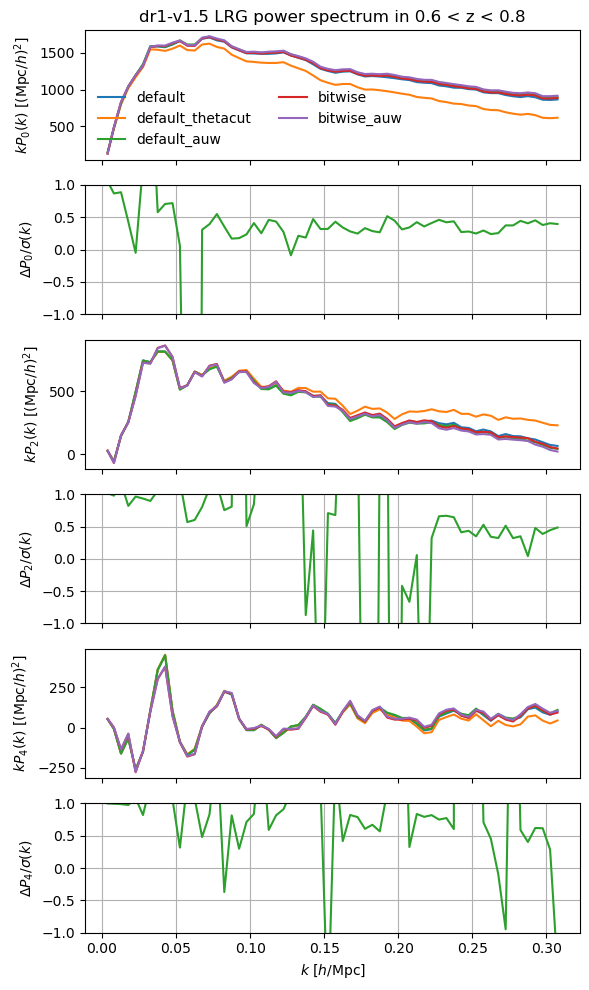

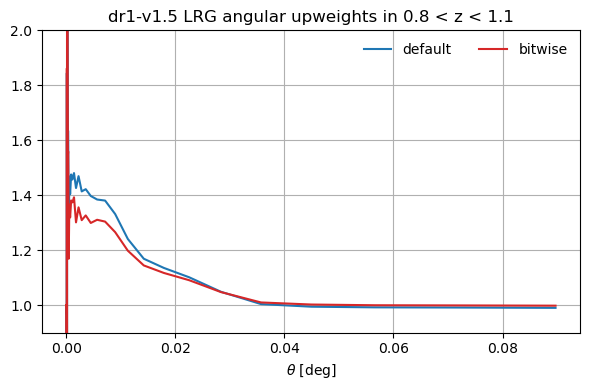

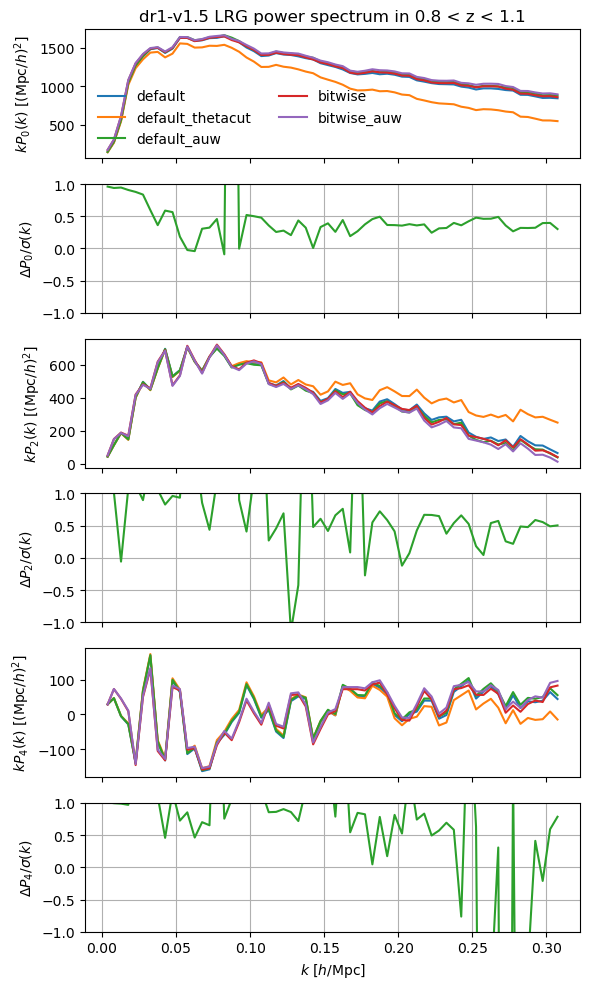

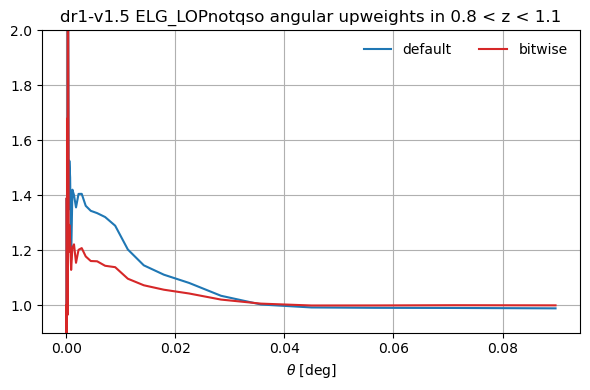

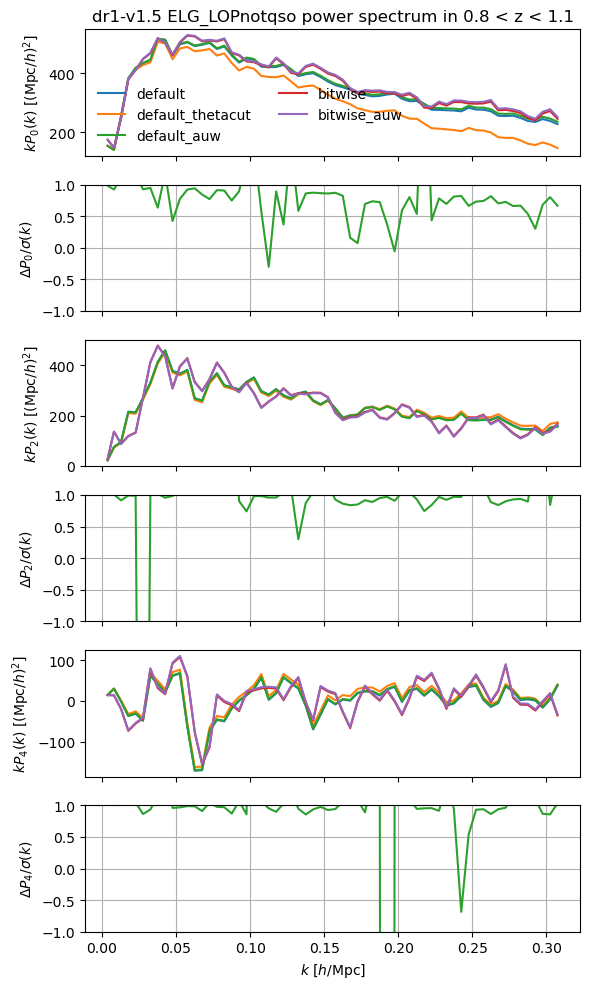

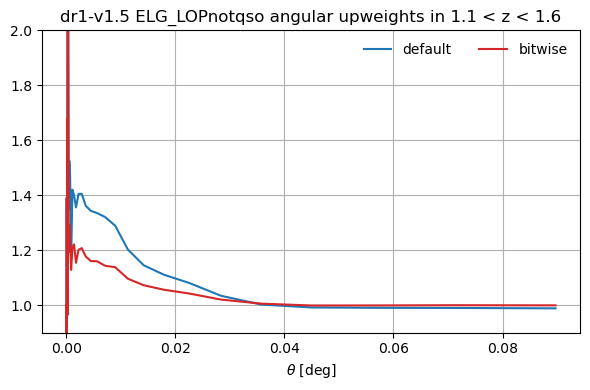

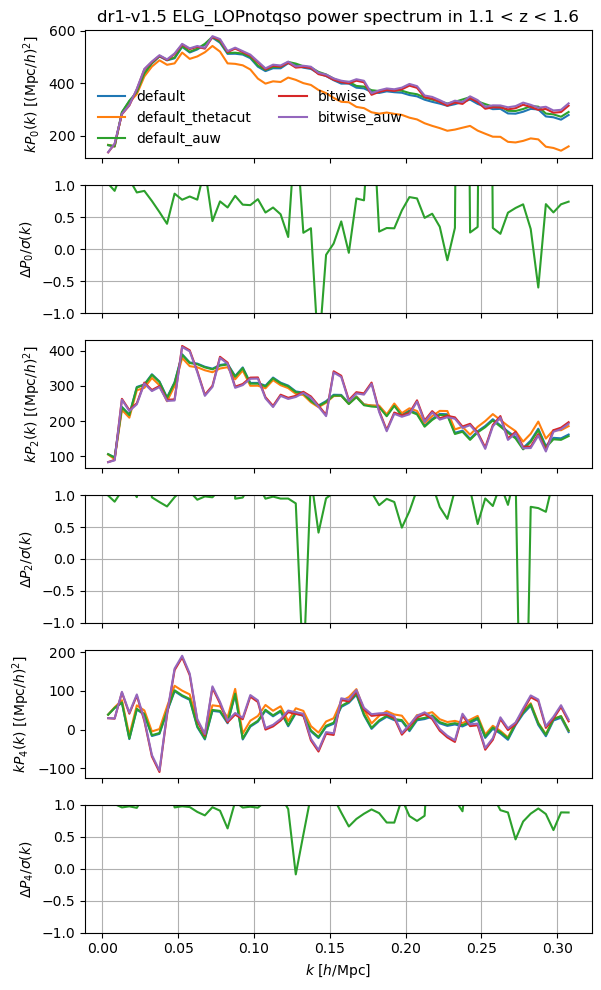

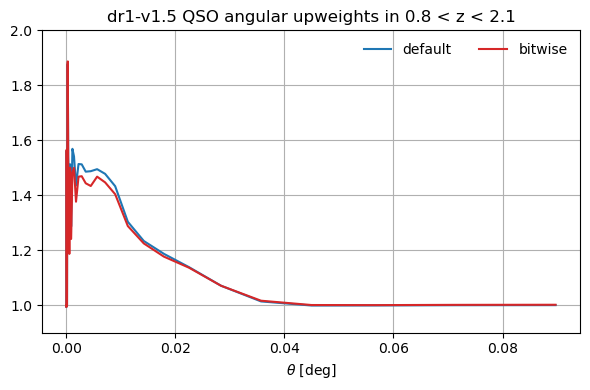

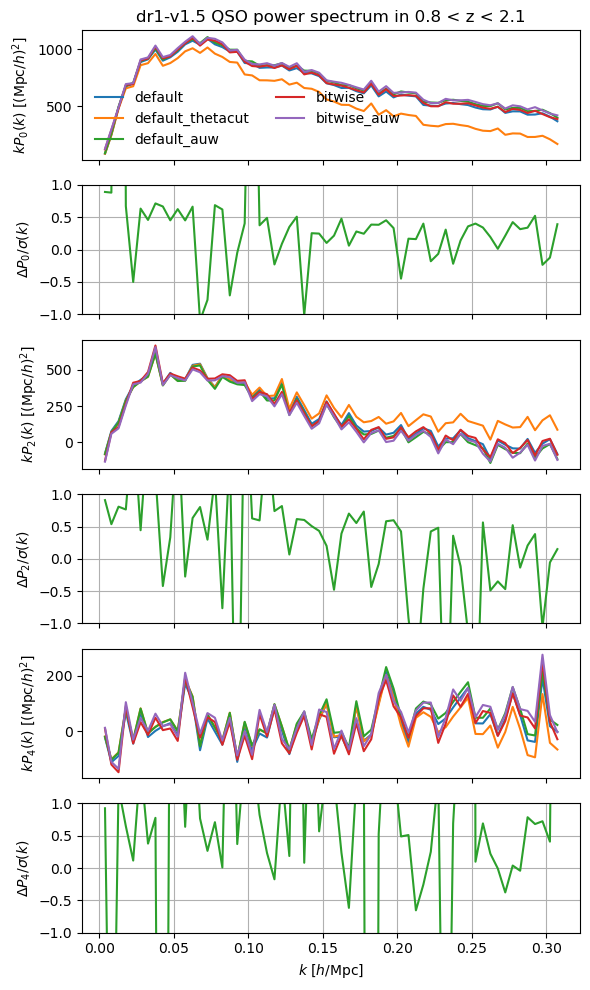

In [2]:
for (tracer, zrange), version in itertools.product(tracers, versions):

    if 'BGS' in tracer:
        tracer = 'BGS_BRIGHT-21.5' if 'dr1' in version else 'BGS_BRIGHT-21.35'
    
    for kind in kinds:

        if 'auw' in kind:

            def get_mean(weight_type):
                fns = [get_measurement_fn(kind=kind, version=version, tracer=tracer, zrange=zrange, region=region, weight_type=weight_type) for region in regions]
                return lsstypes.sum([read(fn).get('DD').value_as_leaf() for fn in fns])

            kind = 'angular_upweights'
            labels = ['default', 'bitwise']
            stats = {label: get_mean(weight_type=label) for label in labels}
            fig, ax = plt.subplots(figsize=(6, 4), sharex=True)
            ax.set_title(f'{version} {tracer} angular upweights in {zrange[0]:.1f} < z < {zrange[1]:.1f}')
            for label in labels:
                weight = stats[label].select(theta=(0., 0.1))
                ax.plot(weight.coords('theta'), weight.value(), color=colors[label], linestyle='-', label=label)
            ax.grid(True)
            ax.set_ylim(0.9, 2.)
            ax.set_xlabel(r'$\theta$ [$\mathrm{deg}$]')
            ax.legend(frameon=False, ncol=2)
            basename = f'comparison_{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}.{ext}'
            plt.tight_layout()
            fig.savefig(plot_dir / basename, bbox_inches='tight', pad_inches=0.1, dpi=200)
            plt.show()

        if 'mesh2_spectrum' in kind:

            def get_mean(weight_type):
                weight_type, auw, cut = {'default_thetacut': ('default', False, 'theta'),
                                         'default_auw': ('default', True, False),
                                         'bitwise_auw': ('bitwise', True, False)}.get(weight_type, (weight_type, False, False))
                fns = [get_measurement_fn(kind=kind, version=version, tracer=tracer, zrange=zrange, region=region, weight_type=weight_type, auw=auw, cut=cut) for region in regions]
                return lsstypes.sum([read(fn) for fn in fns])

            kind = 'mesh2_spectrum_poles'
            labels = weight_types
            stats = {label: get_mean(weight_type=label).select(k=slice(0, None, 5)) for label in labels}
            ref = next(iter(stats.values()))
            ells = ref.ells
            fig, lax = plt.subplots(len(ells) * 2, figsize=(6, 10), sharex=True, squeeze=False)
            lax = lax.ravel()
            lax[0].set_title(f'{version} {tracer} power spectrum in {zrange[0]:.1f} < z < {zrange[1]:.1f}')

            for ill, ell in enumerate(ells):
                ax = lax[2 * ill]
                ax.set_ylabel(rf'$k P_{ell:d}(k)$ [$(\mathrm{{Mpc}}/h)^2$]')
                for label in labels:
                    pole = stats[label].get(ell)
                    ax.plot(pole.coords('k'), pole.coords('k') * pole.value().real, color=colors[label], linestyle='-', label=label)
                if ill == 0: ax.legend(frameon=False, ncol=2)
                ax = lax[2 * ill + 1]
                ax.set_ylabel(rf'$\Delta P_{ell:d} / \sigma(k)$')
                ax.grid(True)
                ax.set_ylim(-1., 1.)
                diff = (stats['bitwise_auw'].get(ell).value() - stats['default_auw'].get(ell).value()).real
                diff /= (stats['bitwise_auw'].get(ell).value() - stats['default'].get(ell).value()).real
                ax.plot(pole.coords('k'), diff, color=colors['default_auw'], linestyle='-')
                
            lax[-1].set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
            basename = f'comparison_{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}.{ext}'
            plt.tight_layout()
            fig.savefig(plot_dir / basename, bbox_inches='tight', pad_inches=0.1, dpi=200)
            plt.show()